In [3]:
%run data_loader.ipynb
%run model.ipynb

In [3]:
dataset = RadarDataset(data_transform, "./data/images_train/")
val_dataset = RadarDataset(data_transform, "./data/images_val/")

data_loader = torch.utils.data.DataLoader(dataset, batch_size=1, collate_fn=collate_fn, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, collate_fn=collate_fn, num_workers=1, shuffle=True)

In [4]:
model = model_ex2
model.to(device)

NewModel(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [4]:
num_epochs = 3
lr=0.0001
optimizer = torch.optim.Adam(model.parameters(), lr)

train_epoch_loss_list = []
val_epoch_loss_list = []
total_loss_dict = []

print('----------------------train start--------------------------')

for i in range(num_epochs):
    epoch_loss = 0
    val_epoch_loss = 0
    model.train()
  
    # Valdiation data
    for weather, imgs, targets in tqdm(val_data_loader, 'Iterating validation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(weather, imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for weather, imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(weather, imgs, targets)
        total_loss_dict.append(loss_dict)
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
    
    train_epoch_loss_list.append(mean_epoch_loss)
    val_epoch_loss_list.append(mean_val_epoch_loss)
    
    # Save
    torch.save(model.state_dict(), './model/ex2_'+str(i+1)+'.pt')
    print(f'epoch : {i+1}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 8145/8145 [22:50<00:00,  5.94it/s]


epoch : 1, Train Loss : 0.2555425478864697, Val Loss : 2.9784761150404226


Iterating train dataset: 100%|██████████████| 8145/8145 [22:52<00:00,  5.93it/s]


epoch : 2, Train Loss : 0.20431634688737332, Val Loss : 0.24321622314026917


Iterating train dataset: 100%|██████████████| 8145/8145 [22:44<00:00,  5.97it/s]


epoch : 3, Train Loss : 0.1818029636223306, Val Loss : 0.20440335341685223


In [ ]:
num_epochs = 12
lr=0.00001

print('----------------------train start--------------------------')

for i in range(num_epochs):
    epoch_loss = 0
    val_epoch_loss = 0
    model.train()
  
    # Valdiation data
    for weather, imgs, targets in tqdm(val_data_loader, 'Iterating validation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(weather, imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for weather, imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(weather, imgs, targets)
        total_loss_dict.append(loss_dict)
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
    
    train_epoch_loss_list.append(mean_epoch_loss)
    val_epoch_loss_list.append(mean_val_epoch_loss)
    
    # Save
    torch.save(model.state_dict(), './model/ex2_'+str(i+4)+'.pt')
    print(f'epoch : {i+4}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 8145/8145 [22:48<00:00,  5.95it/s]


epoch : 4, Train Loss : 0.16457758988508184, Val Loss : 0.18725756370539476


Iterating train dataset: 100%|██████████████| 8145/8145 [22:42<00:00,  5.98it/s]


epoch : 5, Train Loss : 0.15267272379976554, Val Loss : 0.19806022835459092


Iterating train dataset: 100%|██████████████| 8145/8145 [22:51<00:00,  5.94it/s]


epoch : 6, Train Loss : 0.14148768768997427, Val Loss : 0.17531970671587074


Iterating train dataset: 100%|██████████████| 8145/8145 [22:44<00:00,  5.97it/s]


epoch : 7, Train Loss : 0.13318596284303694, Val Loss : 0.19072818190893379


Iterating train dataset: 100%|██████████████| 8145/8145 [22:44<00:00,  5.97it/s]


epoch : 8, Train Loss : 0.12467227999579465, Val Loss : 0.17973716150580604


Iterating train dataset: 100%|██████████████| 8145/8145 [22:50<00:00,  5.94it/s]


epoch : 9, Train Loss : 0.11795339198632107, Val Loss : 0.20305563587930023


Iterating train dataset: 100%|██████████████| 8145/8145 [22:42<00:00,  5.98it/s]


epoch : 10, Train Loss : 0.11154620940090963, Val Loss : 0.185205928851139


Iterating train dataset: 100%|██████████████| 8145/8145 [22:46<00:00,  5.96it/s]


epoch : 11, Train Loss : 0.1064028980405378, Val Loss : 0.18245489908451962


Iterating train dataset: 100%|██████████████| 8145/8145 [22:55<00:00,  5.92it/s]


epoch : 12, Train Loss : 0.10192217314758774, Val Loss : 0.18060542934108526


Iterating train dataset: 100%|██████████████| 8145/8145 [22:59<00:00,  5.90it/s]


epoch : 13, Train Loss : 0.09677345944126008, Val Loss : 0.16732194160906905


Iterating train dataset:  69%|████████▎   | 5653/8145 [20:24<3:00:44,  4.35s/it]

In [6]:
model.load_state_dict(torch.load('./model/ex2_13.pt'))

num_epochs = 2
lr=0.00001

print('----------------------train start--------------------------')

for i in range(num_epochs):
    epoch_loss = 0
    val_epoch_loss = 0
    model.train()
  
    # Valdiation data
    for weather, imgs, targets in tqdm(val_data_loader, 'Iterating validation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(weather, imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for weather, imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(weather, imgs, targets)
        total_loss_dict.append(loss_dict)
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
    
    train_epoch_loss_list.append(mean_epoch_loss)
    val_epoch_loss_list.append(mean_val_epoch_loss)
    
    # Save
    torch.save(model.state_dict(), './model/ex2_'+str(i+14)+'.pt')
    print(f'epoch : {i+14}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 8145/8145 [22:39<00:00,  5.99it/s]


epoch : 14, Train Loss : 0.06841261719580467, Val Loss : 0.203213641804544


Iterating train dataset: 100%|██████████████| 8145/8145 [22:41<00:00,  5.98it/s]


epoch : 15, Train Loss : 0.05618072113934378, Val Loss : 0.20766330694373675


In [1]:
y1 = [0.2555425478864697,
      0.20431634688737332,
      0.1818029636223306,
      0.16457758988508184,
      0.15267272379976554,
      0.14148768768997427,
      0.13318596284303694,
      0.12467227999579465,
      0.11795339198632107,
      0.11154620940090963,
      0.1064028980405378,
      0.10192217314758774,
      0.09677345944126008,
      0.06841261719580467,
      0.05618072113934378
]

y2 = [2.9784761150404226,
      0.24321622314026917,
      0.20440335341685223,
      0.18725756370539476,
      0.19806022835459092,
      0.17531970671587074,
      0.19072818190893379,
      0.17973716150580604,
      0.20305563587930023,
      0.185205928851139,
      0.18245489908451962,
      0.18060542934108526,
      0.16732194160906905,
      0.203213641804544,
      0.20766330694373675
]

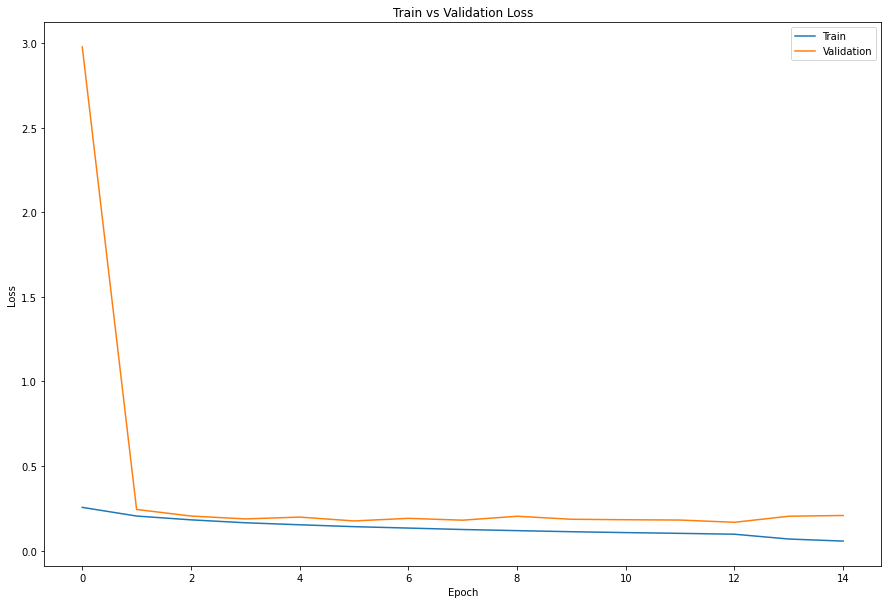

In [4]:
x = list(range(0,len(y1)))

plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "Train")
plt.plot(x, y2, label = "Validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()